<a name="cell-TOC-opt"></a>

$\require{cancel}$

### 7. [Nonlinearity](#cell-opt-fx) [$b=g(x)\not=Ax$](#cell-opt-fx) [and Optimization](#cell-opt-fx)

1. [Optimization, Curvature, and Precision](#cell-opt-fx-curvature)
2. [Minima, Maxima, and the Hessian](#cell-opt-fx-minmax) [$H_{f(\theta)}$](#cell-opt-fx-minmax)
    1. [Multivariate Taylor Series Approximations](#cell-opt-fx-mvtaylor)
3. [The Jacobian](#cell-opt-jac) [$J$](#cell-opt-jac)   
    1. [The Jacobian, Hessian, and Multivariate Multivariate Taylor Series Approximations](#cell-opt-jac-hes)
    
4. [The Score Function and MLE](#cell-opt-mles)
    1. [Fisher Information](#cell-opt-fx-fi)
    2. [More Jacobian inner product Hessian Approximations](#cell-opt-jac-hes2)
    
5. [(Bayesian) Variational Inference](#cell-opt-VI)
    1. [Kullback–Leibler (KL) divergence](#cell-opt-VI)
    
6. [Netwon's Method](#cell-opt-fx-newton)

    1. [Newton's Method for Mulitivariate Functions](#cell-opt-fx-newton-mulit)


<a name="cell-opt-fx"></a>

# 7 Nonlinearity and Optimization $b=f(x)\not=Ax$ ([Return to TOC](#cell-TOC-opt)) 
---

- $Ax=b$ naturally exentds to $g(x)=b$ for a ***nonlinear function*** $f$ 
- and the key ***nonlinear equation*** $\quad f'(z) = 0 \quad \text{ or } \quad \overbrace{\nabla_z f(z) = \mathbf{0}}^{\text{multivariate form}}$ 

which generally specifed ***model fitting*** as an ***optimization problem*** with $z$ solving this equation being ***local minima*** or ***maxima*** of $f$

The ***derivative*** $f'(z)$ is just a another function $g(z)$

- so, e.g., the ***first-order Taylor series approximation*** of $f'$ is simply $\quad f'(x) \approx f'(x_0) + (x-x_0)f''(x_0)$

> *Maximum likelihood estimation is central to statistical inference.  Long hours can be invested in learning about the theoretical performance of MLEs and their analytic derivation.  Faced with a complex likelihood lacking analytic solution, however, many people are unsure how to proceed.*
>
> *Most functions cannot be optimized analytically. ... Many realistic statistical models induce likelihoods that cannot be optimized analytically -- indeed, we would argue that greater realism is strongly assocaited with the reduced ability to find optima analytically.*
> 
> Geof Givens and Jennifer Hoeting, Chapter 2 ***Optimizing and Solving Nonlinear Equations*** of **Computational Stastics**.    

<a name="cell-opt-fx-curvature"></a>
## 7.1 Optimization, Curvature, and Precision ([Return to TOC](#cell-TOC-opt)) 
---

***Optimization solutions*** $f'(x^*)=0$ are found within regions of curvature of $f$ while ***roots*** $f(x_0)=0$ needn't be...

***Curvature*** causes ***numerical precision*** for ***optimization*** is more challenging than for ***root-finding*** contexts 

- To the degree that a ***second order Taylor series approximation*** $g_{\tilde x}(x)$ of $f(x)$ is accurate

$$f(x) \approx g_{\tilde x}(x) = f(\tilde x) + (x - \tilde x) f'(\tilde x) + f''(\tilde x)\frac{(x-\tilde x)^2}{2}$$

- changes in $f(x) \approx g_{\tilde x}(x)$ are likely dominated by 
  
    - the linear term $(\underbrace{x-\tilde x}_{\epsilon_{machine}})f'(\tilde x)$ when $\tilde x$ is near ***root*** $x_0$ since $f'(\tilde x \approx x_0) \overset{\text{likely}}{\not \approx} 0$
    - the quadratic term $\frac{1}{2}(\underbrace{x-\tilde x}_{\sqrt{\epsilon_{machine}}})^2f''(\tilde x)$ when $\tilde x$ is near ***optimum*** $x^*$ since $f'(\tilde x \approx x^*)\approx 0$
  
- The coefficient $(x-\tilde x)^2$ can only support the square root of the precision of $(x-\tilde x)$

    - $f(x) \approx g_{x^*}(x)$ evaluated near an ***optimization problem solution*** $x^*$ supports about half the ***numerical precision*** of $f(x) \approx g_{x_0}(x)$ evaluated near one of its ***roots*** $x_0$

        - however, note that $f'(x)\approx g_{x^*}'(x) = 2(x-\tilde x)$ doesn't have this problem...

<a name="cell-opt-fx-minmax"></a>
## 7.2 Minima, Maxima, and the Hessian $H_{f(\theta)}$ ([Return to TOC](#cell-TOC-opt)) 
---

The ***Hessian*** is the ordered (***symmetric***) collection of ***second order partial derivatives***

$$
\begin{align*}
[H_{f(z)} (z')]_{ij} = \frac{\partial^2 f(z')}{\partial z_i\partial z_j}
 \quad \text{ so } \quad 
 H_{f(z)} (z') = {} & \left[ \begin{array}{ccc}
\frac{\partial^2 f(z')}{\partial z_1\partial z_1} & \cdots & \frac{\partial^2 f(z')}{\partial z_1\partial z_p}\\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f(z')}{\partial z_p\partial z_1} & \cdots & \frac{\partial^2 f(z')}{\partial z_p\partial z_p}
\end{array} \right] = \underset{\text{be discussed}}{\underbrace{J(\nabla_z f)(z')}_{\text{Jacobian $J$ to}}} \\\\
= {} &\left[ \frac{\partial}{\partial z_1}\nabla_z f(z') \;\;\cdots\;\; \frac{\partial}{\partial z_k}\nabla_z f(z') \;\;\cdots\;\; \frac{\partial}{\partial z_p}\nabla_z f(z') \right]
\end{align*}$$

which define the (instantaneous) ***curvature*** of $f$ at domain point $z'$ 

***Curvature*** $H_{f(z)} (z^*) \quad$ not $\nabla_z f(x_z) = \mathbf{0}\quad$ distinguish between ***minima*** and ***maxima*** where $z^*$ will be a (local)
- ***maximum*** if $H_{f(z)} (z^*)$ is ***negative semi-definite***
  - $x^T H_{f(z)} (z^*) x \leq 0$; and, $\lambda_i \leq 0$ for all ***eigenvalues*** $\lambda_i$ of $H_{f(z)}(z^*)$
- ***minimum*** if $H_{f(z)} (z^*)$ is ***positive semi-definite***
  - $x^T H_{f(z)} (z^*) x \geq 0$; and, $\lambda_i \geq 0$ for all ***eigenvalues*** $\lambda_i$ of $H_{f(z)}(z^*)$



<a name="cell-opt-fx-mvtaylor"></a>

### 7.2.A Multivariate Taylor Series Approximations ([Return to TOC](#cell-TOC-opt)) 

---

The relationship between the (***negative*** or ***positive***) ***definiteness*** of $H_{f(z)}(z^*)$ and the (local ***maxima*** or ***minima***) nature of the ***optimum*** $f(z^*)$ can be seen from the generalization of ***Taylor's Theorem*** to scalar valued multivariate functions:

\begin{align*}
f(z) = {} & f(z^*) + (z - z^*)^T\nabla_z f(z^*) + \frac{1}{2}(z-z^*)^T H_{f(z')}(z^*)(z-z^*) \; \underbrace{+ \;O(||z-z^*||^3_2)}_{\text{the "Theorem" part}}
\end{align*}

since for $\nabla_z f(z^*) = \mathbf{0}$ and small deviations $z=z^*+\epsilon$ the difference

\begin{align*}
f(z) - f(z^*) = {} & \underbrace{\frac{1}{2}(z-z^*)^T H_{f(z')}(z^*)(z-z^*)}_{O(||z-z^*||^2_2) \;\text{ dominates }\; O(||z-z^*||^3_2)} + O(||z-z^*||^3_2)
\end{align*}

- will be negative if $H_{f(z)} (z^*)$ is ***negative definite***, so $f(z^*)$ is a ***maximum***
- will be positive if $H_{f(z)} (z^*)$ is ***positive definite***, so $f(z^*)$ is a ***minimum***

<a name="cell-opt-jac"></a>

## 7.3 The Jacobian $J$ ([Return to TOC](#cell-TOC-opt)) 

---

The ***Hessian*** $H_{f(z)}$ matrix of ***second order partial derivatives*** of $f(z)$ is (of course) distinct from the ***Jacobian*** $J$, which is a (different) matrix of ***first order partial derivatives*** for the ***multivariate*** $y = g(z)$ which maps $z \in {\rm I\!R}^p$ to $y\in {\rm I\!R}^q$.

The orientation of ***Jacobian*** is easy to remember as it maintains the same column orientation of the function vector by concatenating the columns of partial derivatives into the ***Jacobian*** matrix
 
$$g(z) = \left[ \begin{array}{c}g_1(z)\\\vdots \\ g_q(z) \end{array}\right] \quad\quad \Longrightarrow \quad\quad J g(z)(z') = \left[ \begin{array}{c:c:c} \frac{\partial}{\partial z_1} g_1(z') & \longrightarrow & \frac{\partial}{\partial z_p} g_1(z') \\\vdots \\ \frac{\partial}{\partial z_1} g_q(z') & \longrightarrow &\frac{\partial}{\partial z_p} g_q(z') \end{array}\right]$$

where $y_i = g_i(z)$ is the $i^{th}$ element of the multivariate output of $g(z)$. Some other expressions of this are 

$$ 
[Jg(z)(z')]_{ij} = \frac{\partial g_i(z')}{\partial z_j}  
 \quad \text{ or } \quad Jg(z)(z') = \begin{array}{c}\overset{y_1}{\underset{y_q}{\Bigg \downarrow}}\end{array} \overset{z_1 \overset{\partial}{\;-\!-\!-\!-\!-\!-\!-\!-\!\!\longrightarrow} \; z_p}{\left[ \begin{array}{ccc}
\frac{\partial g_1(z')}{\partial z_1} & \cdots & \frac{\partial g_1(z')}{\partial z_p}\\
\vdots & \ddots & \vdots \\
\frac{\partial g_q(z')}{\partial z_1} & \cdots & \frac{\partial g_q(z')}{\partial z_p}
\end{array} \right]} = \left[ \begin{array}{c}(\nabla_z g_1 )^T(z')\\\vdots  \\ (\nabla_z g_p )^T(z') \end{array}\right]$$ 



<a name="cell-opt-jac-hes"></a>
### 7.3.A The Jacobian, Hessian, and Multivariate Multivariate Taylor Series Approximations  ([Return to TOC](#cell-TOC-opt)) 
---

As noted above and now seen clearly from the definition of the ***Jacobian***, the ***Hessian*** is

$$H_{f(z)}(z') = J(\nabla_z f)(z') = \left[ \frac{\partial}{\partial z_1}\nabla_z f(z') \;\;\cdots\;\; \frac{\partial}{\partial z_j}\nabla_z f(z') \;\;\cdots\;\; \frac{\partial}{\partial z_p}\nabla_z f(z') \right]$$

For functions with both multivariate outputs *and inputs*, the ***first order Taylor Series approximiation*** replaces ***gradient*** with ***Jacobian*** 

$$\underbrace{f(\theta) \approx f(\theta_0) + (\nabla_\theta f)^T(\theta_0)(\theta-\theta_0)}_{\text{when $f$ has multivariate input and univariate output}} \quad \text{ generalizes to } \quad \underbrace{f(\theta) \approx f(\theta_0) + J f_\theta (\theta_0)(\theta-\theta_0)}_{\text{when $f$ has both multivariate input } \textbf{and} \text{ output}} $$

so the $i^{th}$ element of the approximation vector is the ***first order Taylor Series approximiation*** for the $i^{th}$ univariate output $f_i$; and, 

$$\scriptsize\begin{align*}\min_\theta \frac{||y - f_\theta(x)||_2^2}{2} \approx {} & \frac{||y - \big(\overbrace{f_{\theta^*}(x)}^{f_x(\theta^*)}+\overbrace{J(f_{\theta}(x))(\theta^*)}^{J_{f_x(\theta)}(\theta^*)}(\theta-\theta^*)\big)||_2^2}{2} = \overbrace{ \left( y - \left(f_x(\theta^*)+J_{f_x(\theta)}(\theta^*)(\theta-\theta^*)\right) \right)^T\frac{1}{2}\left( y - \left(f_x(\theta^*)+J_{f_x(\theta)}(\theta^*)(\theta-\theta^*)\right) \right) }^{g(\theta)}\\
= {} & \frac{1}{2}y^Ty - y^T \left(f_x(\theta^*)+J_{f_x(\theta)}(\theta^*)(\theta-\theta^*)\right) + f_x(\theta^*)^T J_{f_x(\theta)}(\theta^*) + (\theta-\theta^*)^T\left(J_{f_x(\theta)}(\theta^*)\right)^T\left(J_{f_x(\theta)}(\theta^*)\right)(\theta-\theta^*) = g(\theta)
\end{align*}$$

so the ***Hessian*** of $g(\theta)$ a ***first order Taylor series approximation*** around optimal $\theta^*$ of ***least squares objective function***<br>is the ***inner product*** of the ***Jacobian*** $H_{g(\theta)} = \left(J_{f_x(\theta)}(\theta^*)\right)^T\left(J_{f_x(\theta)}(\theta^*)\right)$

<!-- 
- This is the ***nonlinear least squares*** problem generalizing the ***least squares*** problem from [Section 1.1.2](#cell-sovling-qrls) and [Section 1.2.2](#cell-sovling-least-squares).  An ***iterative*** approach to solving this problem, building upon the "Iterative Methods" ([Section 1.2](#cell-sovling-iterative)) is continued in the "Gauss-Newton" section [(Section 3.4.0)](#cell-opt-fx-gauss-newton) below.
-->

<a name="cell-opt-mles"></a>
## 7.4 The Score Function and MLE ([Return to TOC](#cell-TOC-opt)) 
---

The ***score function*** is the gradient of the ***log likelihood***

$$\nabla_\theta l(\theta') = \left( \frac{\partial l(\theta')}{\partial \theta_1}, \cdots, \frac{\partial l(\theta')}{\partial \theta_p} \right)^T
\quad \text{ where } \quad l(\theta) = \log f(x|\theta) \overset{iid}{=} \log \prod_{i=1}^n f(x_i|\theta)$$

***Maximum Likelihood Estimates*** (***MLEs***) come from the (***nonlinear***) ***score equation*** which sets the ***score function*** equal to $\mathbf{0}$.  And for the ***true value*** of the parameter $\theta^{\text{true}}$, the ***score function*** has expected value $\mathbf{0}$ with respect to $f(x|\theta^{\text{true}})$ the distribution of the data. So

$$\underbrace{\nabla_\theta l(\hat \theta) = \mathbf{0}}_\text{score equation} \quad \text{ and } \quad E_X \!\underbrace{\left[\nabla_\theta l(\theta^{\text{true}})\right]}_{\text{score function}} \!= \mathbf{0}$$

The expected value of the ***score function*** follows since

$$\scriptsize
\begin{align*}
E \left[\nabla_\theta l(\theta)\right] 
= {} & \int \nabla_\theta l(\theta) f(x|\theta) dx = \int \left( \frac{\partial l(\theta)}{\partial \theta_1}, \cdots, \frac{\partial l(\theta)}{\partial \theta_p} \right)^T f(x|\theta) dx\\
= {} &\int \left( \frac{1}{f(x|\theta)}\frac{\partial f(x|\theta)}{\partial \theta_1}, \cdots, \frac{1}{f(x|\theta)}\frac{\partial f(x|\theta)}{\partial \theta_p} \right)^T f(x|\theta) dx \\
= {} & \int \left( \frac{\partial f(x|\theta)}{\partial \theta_1}, \cdots, \frac{\partial f(x|\theta)}{\partial \theta_p} \right)^T dx = \int \nabla_\theta f(x|\theta) dx \\
= {}& \nabla_\theta \int  f(x|\theta) dx  \nabla_\theta \, 1 = \mathbf{0} \\
\end{align*}$$

<a name="cell-opt-fx-fi"></a>

### 7.4.A Fisher Information ([Return to TOC](#cell-TOC-opt)) 

---

The ***Fisher information matrix*** $I(\theta^{\text{true}})$ or ***expected Fisher information matrix*** is the expected value of the ***outer product*** of the ***score function*** with itself and [is equal to](https://math.stackexchange.com/questions/3585130/why-is-the-fisher-information-matrix-both-an-expected-outer-product-and-a-hessia) the expected value of the negative of the ***Hessian*** of the log likelihood 

$$\mathcal I(\theta^{\text{true}}) = E_X[\nabla_\theta l(\theta^{\text{true}})(\nabla_\theta l(\theta^{\text{true}})^T] = E_X[-H_{l(\theta)}(\theta^{\text{true}})] \quad \text{ with respect to the distribution of the data } f(x|\theta^{\text{true}})$$

The ***observed Fisher information*** refers to
$$\begin{align*}
\text{ either } \quad \hat{\mathcal I( \theta)} = {} & -H_{l(\theta)}(\hat \theta) = \overbrace{-J(\nabla_\theta l)(\hat \theta) \approx - \sum_{i=1}^n J( \nabla_\theta log f(x_i|\theta))\big|_{\hat \theta}}^{\text{$J(\nabla_\theta l) (\hat \theta)$ }\textit{Jacobian}\text{ of }\textit{score function} \text{ evaluated at } \hat \theta} \\
\text{ or } \quad \hat{\mathcal I( \theta)} \approx {} & \sum_{i=1}^n \left(\nabla_\theta log f(x_i|\theta)\big|_{\hat \theta}\right)\left(\nabla_\theta log f(x_i| \theta)\big|_{\hat \theta}\right)^T 
\end{align*}$$

And the [***asymptotic distribution*** of the ***MLE***](https://gregorygundersen.com/blog/2019/11/28/asymptotic-normality-mle/) is 

$$ p(\hat \theta) \overset{n \rightarrow \infty}{\longrightarrow} N\!\left(\theta^{\text{true}}, \Sigma = \frac{\mathcal I(\theta^{\text{true}})^{-1}}{n}\right) \approx N\!\left(\theta^{\text{true}}, \Sigma = \frac{\hat{\mathcal I( \theta)}{}^{-1}}{n} \approx \frac{\mathcal I(\theta^{\text{true}})^{-1}}{n}\right)$$

where either plug-in estimate for the ***expected Fisher information matrix*** $\mathcal I(\theta^{\text{true}})$ might be the preferred choice for a given context

***Fisher information*** is the negative of the ***hessian*** since ***Fisher information*** is ***positive definite*** while the ***hessian*** is ***negative definite*** since ***log likelihood (MLE) optimization*** is a ***maximization*** problem

<!--
- $H_{l(\theta)}(\hat \theta)$ at ***local maxima*** $\hat \theta$ is ***negative definite***; whereas, the ***least squares optimization*** is a ***minimization*** problem
      
- $H_{g(\theta)}(\theta^*)$ at ***local minima*** $\theta^*$ is ***positive definite***.

--> 

<a name="cell-opt-jac-hes2"></a>
### 7.4.B More Jacobian inner product Hessian Approximations ([Return to TOC](#cell-TOC-opt)) 
---

The ***outer products*** of ***gradients*** is  
$$\scriptsize\left(\nabla_\theta l(\theta')\right)\left( \nabla_\theta l(\theta') \right)^T = 
\left[\begin{array}{c}\frac{\partial l(\theta')}{\partial \theta_1}\\\vdots\\\frac{\partial l(\theta')}{\partial \theta_p}\end{array}\right] \left[ \frac{\partial l(\theta')}{\partial \theta_1}, \cdots, \frac{\partial l(\theta')}{\partial \theta_p} \right] = \left[\begin{array}{cccc}\frac{\partial l(\theta')}{\partial \theta_1}\frac{\partial l(\theta')}{\partial \theta_1}&\frac{\partial l(\theta')}{\partial \theta_1}\frac{\partial l(\theta')}{\partial \theta_2} & \cdots\\\frac{\partial l(\theta')}{\partial \theta_2}\frac{\partial l(\theta')}{\partial \theta_1} & \ddots\\\vdots&&\frac{\partial l( \theta')}{\partial \theta_p}\frac{\partial l(\theta')}{\partial \theta_p}\end{array}\right]$$
so the ***inner product*** of the ***Jacobian*** 
$$\scriptsize
\left(Jg(z)(z')\right)^T\left(Jg(z)(z')\right) = \left[ \nabla_z g_1 (z'), \nabla_z g_i (z'), \cdots, \nabla_z g_p (z') \right] \left[ \begin{array}{c}(\nabla_z g_1 )^T(z')\\\vdots \\ (\nabla_z g_i )^T(z') \\\vdots \\ (\nabla_z g_p )^T(z') \end{array}\right] = \left[ \begin{array}{ccc} \frac{\partial g}{\partial z_1}(z')^T\frac{\partial g}{\partial z_1}(z') & \frac{\partial g}{\partial z_1}(z')^T\frac{\partial g}{\partial z_2}(z') & \cdots\\
\frac{\partial g}{\partial z_2}(z')^T\frac{\partial g}{\partial z_1}(z') & \ddots \\
\vdots & & \frac{\partial g}{\partial z_p}(z')^T\frac{\partial g}{\partial z_p}(z')  \end{array}\right]
$$

is a multivariate generalization of this exact concept since for $z_j = \theta$ and $g_i = log f(x_i|\theta)$ 
$$\left(Jg(z)(z')\right)^T\left(Jg(z)(z')\right) = \sum_{i=1}^n \left(\nabla_\theta l(\theta')\right)\left( \nabla_\theta l(\theta') \right)^T =  \sum_{i=1}^n \left(\nabla_\theta log f(x_i|\theta)\big|_{\hat \theta}\right)\left(\nabla_\theta log f(x_i| \theta)\big|_{\hat \theta}\right)^T$$


So just as the ***inner product*** of the ***Jacobian*** is the approximation of the ***Hessian*** in a ***least squares nonlinear optimization*** problem<br>the ***Fisher information*** is the approximation of the negative ***Hessian*** in the ***MLE*** context


<a name="cell-opt-VI"></a>
## 7.5 (Bayesian) Variational Inference ([Return to TOC](#cell-TOC-opt)) 
---

***Approximate Bayesian analysis*** may proceed on the basis of 

$$
\begin{align*}
\log p(y) = {}& \int \log p(y) q(\theta) d\theta = \int \log \left(\frac{p(\theta,y)}{p(\theta|y)} \frac{q(\theta)}{q(\theta)}\right) q(\theta) d\theta = \int \log \left( \frac{p(y|\theta)p(\theta)}{p(\theta|y)} \frac{q(\theta)}{q(\theta)}\right) q(\theta) d\theta \\
= {} & \int \left[ \log p(y|\theta)
+ \log
 \frac{q(\theta)}{p(\theta|y)} 
-
\log \frac{q(\theta)}{p(\theta)} \right] q(\theta) d\theta \\
= {} & \underbrace{\int \log p(y|\theta) q(\theta) d\theta }_{E_{q(\theta)}[\log p(y|\theta)]} + KL[\, q(\theta) \, || \, p(\theta|y) \,]  - KL[\, q(\theta) \, || \, p(\theta) \,] \; \text{ with }\; \underbrace{KL[\, q(\theta) \, || \, p(\theta) \,]  = \int \log \frac{q(\theta)}{p(\theta)} q(\theta) d \theta}_{\textbf{Kullback-Leibler (KL) divergence}}
\end{align*}
$$

Namely, optimally approximating the posterior $p(\theta|y)$ with $q(\theta)$ is equivalent to maximizing the ***Evidence Lower BOund***

$$\log p(y) \geq  \overbrace{E_{q(\theta)}[\log p(y|\theta)] - KL[\, q(\theta) \, || \, p(\theta) \,]}^{\text{ELBO}(q)} \quad \text{ i.e.,}$$

$$\min_q KL[\, q(\theta) \, || \, p(\theta|y) \,]  \quad \underset{\text{(since KL terms are nonnegative)}}{\text{ is equivalent to }} \quad \max_q \text{ELBO}(q) \quad \left(\text{or } \min_q -\text{ELBO}(q)\right)$$


Approximating the ***posterior*** in this manner is known as ***variational inference*** and is accomplished by solving the
***nonlinear equation***

$$\nabla_\phi\text{ELBO}(q_\phi(\theta)) = \mathbf{0}$$


## 7.5 (Bayesian) Variational Inference 

---

The $\text{ELBO}(q)$ may be equivalently defined in terms of only expectations (and no KL-terms) since, using ***Jensen's inequality***

$$ 
\begin{align*}
\log p(y) = {} & \log \int p(y,\theta) \frac{q(\theta)}{q(\theta)} d\theta \quad \quad \longrightarrow  &={}&  \log \int  p(y|\theta)\frac{p(\theta)}{q(\theta)} q(\theta) d\theta \\
= {} & \log E_{q(\theta)}\left[ p(y,\theta)\frac{1}{q(\theta)} \right] \quad \; \longrightarrow  &={}&  \log E_{q(\theta)}\left[ p(y|\theta)\frac{p(\theta)}{q(\theta)} \right]\\
\geq {} & E_{q(\theta)}\left[ \log \frac{p(y,\theta)}{q(\theta)} \right] \quad \quad \;\,\; \longrightarrow &={} & E_{q(\theta)}\left[ \log \left(p(y|\theta)\frac{p(\theta)}{q(\theta)}\right) \right] \\
= {} & \underbrace{E_{q(\theta)}[ \log p(y,\theta)] - E_{q(\theta)}[ \log q(\theta)]}_{\text{ELBO}(q)} &={} & \underbrace{E_{q(\theta)}[ \log p(y|\theta)] - KL[\, q(\theta) \, || \, p(\theta) \,]}_{\text{ELBO}(q)}
\end{align*}
$$

And the $\text{ELBO}(q)$ is often just derived directly from the desired Bayesian optimization

$$
\begin{align*}
KL[\, q(\theta) \, || \,  p(\theta|y) \, ] = {} & \int \log \frac{q(\theta)}{p(\theta|y)}q(\theta)d\theta\\
= {} & \int \log \frac{q(\theta)p(y)}{p(y|\theta)p(\theta)}q(\theta) d\theta\\
= {} & \log p(y) + \int \log \frac{q(\theta)}{p(\theta)}q(\theta) d\theta - \int \log p(y|\theta) q(\theta) d\theta \\
= {} & \log p(y) + \underbrace{KL[\, q(\theta) \, || \,  p(\theta) \, ] - E_{q(\theta)}[ \log p(y|\theta)]}_{-\text{ELBO}(q)} \\
\end{align*}
$$


<a name="cell-opt-fx-newton"></a>

## 7.6 Newton's Method ([Return to TOC](#cell-TOC-opt)) 
---

Also known as ***Newton-Raphson iteration***, using a first-order Taylor series approximation of $g'$ in the equation of interest

$$\overbrace{0 = g'(x^*)}^{\text{original problem}} \approx g'(x^{(t)}) + (x^*-x^{(t)})g''(x^{(t)}) =0 \quad \text{ so long as $g''$ exists (and is non-zero at $x^{(t)}$)}$$

$$  x^* = x^{(t)} - \frac{g'(x^{(t)})}{g''(x^{(t)})} \quad \text{ suggests the iterative update } \quad x^{(t+1)} = x^{(t)} + h^{(t)} \quad \text{ with } \quad h^{(t)}=- \frac{g'(x^{(t)})}{g''(x^{(t)})} $$


$g''(x)$ is the (instantaneous) slope of $g'$ at $x$ so solving the approximation of $g'$ for $0$ means following the slope until hitting $y=0$

| | |
|-|-|
|![](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)| [Wikipedia's Newton's Method page](https://en.wikipedia.org/wiki/Newton%27s_method): $f(x)$ is $g'(x)$<br><br>***Newton's method*** is introduced here in the context of <br>solving $g'(x^*) = 0$ (and thus ends up depending on $g''$);<br>however, ***Newton's method*** more generally is simply a<br>***root-finding*** method based on a ***first-order Taylor series***<br>***approximation*** of any function $f$ (and not necessarily <br>an approximation of the ***derivative*** of a function $g'$).<br>This is why, e.g., the wikipedia presentation introduces<br>***Newton's method*** without any attention to the<br>$g'(x^*) = 0$ problem.|


- [Week 9 Programming Assignment Question 2](#cell-opt) will involve implementing a ***Newton's method***, ***secant method***, ***fixed point iteration*** and some variants on these methods.



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
# plt.style.use('ggplot')
import numpy as np

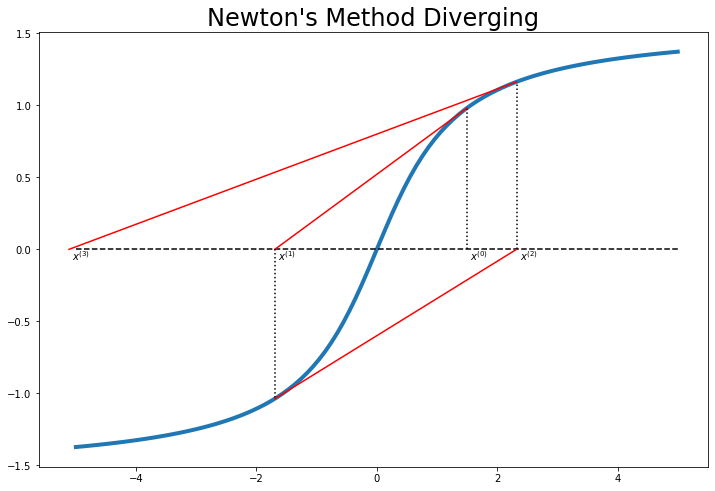

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('default')

x = np.linspace(-5,5,100)
plt.plot(x, np.arctan(x), linewidth=4)
plt.plot(x,[0]*len(x),'k--')
plt.title("Newton's Method Diverging", fontdict={'fontsize': 24})

x0 = 1.5
x = tf.Variable(x0, dtype=np.float32)
plt.text(x, 0, ' $x^{(0)}$', verticalalignment='top')
for t in range(1,4):

  with tf.GradientTape() as t2:
    with tf.GradientTape() as t1:
      y = x*tf.math.atan(x) - 0.5*tf.math.log(1+x**2)
      # dy/dx = arctan(x) # oh, okay
      # ddy/dxdx = 1/(1+x^2) # oh, nice
      # but who cares to remember this when
      # tf can just numerically differentiated it

    # Compute the gradient inside the outer `t2` context manager
    # which means the gradient computation is differentiable as well.
    dy_dx = t1.gradient(y, x)
      
  # https://www.tensorflow.org/guide/advanced_autodiff#higher-order_gradients    
  d2y_dx2 = t2.gradient(dy_dx, x)

  x_t = tf.Variable(x - dy_dx/d2y_dx2)
  plt.plot([x, x], [0,dy_dx], 'k:')
  plt.plot([x,x_t], [dy_dx,0], c='r')
  plt.text(x_t, 0, ' $x^{('+str(t)+')}$', verticalalignment='top')
  x = x_t

*This example was inspired by [this figure](http://amsi.org.au/ESA_Senior_Years/imageSenior/2a_numerical_methods_graph_7.png) from [this tutorial](http://amsi.org.au/ESA_Senior_Years/SeniorTopic3/3j/3j_2content_2.html) from the Austalian Mathematical Science Institute, and the discussions regarding convergence in Chapter 2.1.1 **Newton's Method** of the Givens and Hoeting **Computational Statistics** textbook (pages 27-29).*

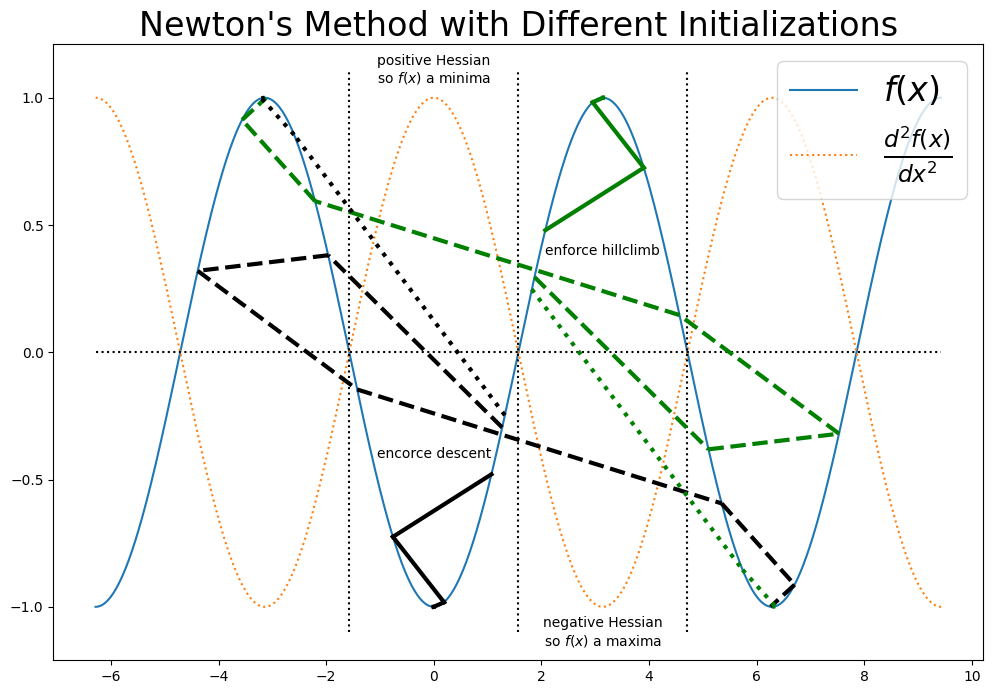

In [ ]:
f = lambda x: -np.cos(x)
dfdx = lambda x: np.sin(x)
d2fdx2 = lambda x: np.cos(x)

x = np.linspace(-2*np.pi,3*np.pi,1000)
plt.figure(figsize=(12,8))
plt.plot(x,f(x), label='$f(x)$')
plt.plot(x,d2fdx2(x), ':', label='$\\frac{d^2f(x)}{dx^2}$')
plt.legend(fontsize=24)
plt.title("Newton's Method with Different Initializations",
          fontdict={'fontsize': 24}) 
plt.plot(x, 0*x, 'k:')
plt.plot([np.pi/2]*2, [-1.1,1.1], 'k:')
plt.plot([-np.pi/2]*2, [-1.1,1.1], 'k:')
plt.plot([1.5*np.pi]*2, [-1.1,1.1], 'k:')

plt.text(0, 1.11, 'positive Hessian\nso $f(x)$ a minima', 
         horizontalalignment='center', verticalalignment='center')
plt.text(2*np.pi/2, -1.1, 'negative Hessian\nso $f(x)$ a maxima', 
         horizontalalignment='center', verticalalignment='center')
plt.text(2*np.pi/2, .4, 'enforce hillclimb', 
         horizontalalignment='center', verticalalignment='center')
plt.text(0, -.4, 'encorce descent', 
         horizontalalignment='center', verticalalignment='center')

for x,style in zip([np.pi/2-.5, np.pi/2+.5, 
              np.pi/2-.3, np.pi/2+.3, 
              np.pi/2-.25, np.pi/2+.25], ['k','g','k--','g--','k:','g:']):
  for i in range(6):#0
    alpha=1#.1
    x_t = x - alpha*dfdx(x)/(d2fdx2(x)-0)
    plt.plot([x,x_t], [f(x),f(x_t)], style, linewidth=3)
    x = x_t

<a name="cell-opt-fx-newton-mulit"></a>

### 7.6.A Newton's Method for Mulitivariate Functions ([Return to TOC](#cell-TOC-opt)) 

---

For vector $x$ in ${\rm I\!R}^d$ ***scalar valued*** $g(x)$ the update for ***Newton's Method*** depend on the ***condition*** of $H_{g(x)}(x^{(t)})$

$$x^{(t+1)} = x^{(t)} - \left[H_{g(x)}(x^{(t)})\right]^{-1}\nabla_xg(x^{(t)})\quad \text{ in place of } \quad x^{(t+1)} = x^{(t)} - \frac{g'(x^{(t)})}{g''(x^{(t)})}$$

as derived from the multivariate generalization of the ***second order Taylor series expansion***

$$\begin{align*}
g(x^*) \approx {} & g(x^{(t)}) + (x^*- x^{(t)})^T\nabla_x g(x^{(t)}) + \frac{1}{2}(x^*- x^{(t)})^T H_{g(x)}(x^{(t)})(x^*- x^{(t)})\\
\nabla_{x^*}g(x^*) \approx {} & \nabla_{x^*}\left[ g(x^{(t)}) + (x^*- x^{(t)})^T\nabla_x g(x^{(t)}) + \frac{1}{2}(x^*- x^{(t)})^T H_{g(x)}(x^{(t)})(x^*- x^{(t)}) \right]\\
= {} & \nabla_x g(x^{(t)}) + H_{g(x)}(x^{(t)})(x^*- x^{(t)}) = 0\\ 
\Longrightarrow x^{(t+1)} = {} &  x^{(t)} - \left[H_{g(x)}(x^{(t)})\right]^{-1} \nabla_x g(x^{(t)}) 
\end{align*}$$

The direction of the update is calculated by
solving for $d$ in 

$$H_{g(x)}(x^{(t)})\,d= \nabla_x g(x^{(t)})$$

rather than actually inverting the Hessian $H$ matrix 

- [STA410_W24_Week7_Homework_NewtonsMethod.ipynb]() will involve implementing a ***Newton's method*** for a scalar valued multivariate function.